In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('owid-co2-data.csv')

In [2]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [3]:
df_info = {
    "shape": df.shape,
    "missing_values_percentage": df.isna().mean().sort_values(ascending=False).head(40)
}

In [4]:
df_info

{'shape': (50191, 79),
 'missing_values_percentage': share_global_cumulative_other_co2      0.958000
 share_global_other_co2                 0.958000
 other_co2_per_capita                   0.950708
 other_industry_co2                     0.936204
 cumulative_other_co2                   0.936204
 consumption_co2_per_gdp                0.911458
 consumption_co2_per_capita             0.910303
 trade_co2                              0.909645
 trade_co2_share                        0.909645
 consumption_co2                        0.903050
 energy_per_gdp                         0.846666
 co2_including_luc_per_unit_energy      0.806718
 energy_per_capita                      0.798589
 primary_energy_consumption             0.797753
 co2_per_unit_energy                    0.793788
 share_global_cumulative_flaring_co2    0.783447
 share_global_flaring_co2               0.783447
 flaring_co2_per_capita                 0.707238
 share_global_cumulative_gas_co2        0.700464
 share_global_gas

In [4]:
missing_by_year = df[df.columns[4:]].isna().groupby(df['year']).mean()


In [5]:
missing_by_year

,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,,,,,,,,,,,,,,,,,,,,,
1750,1.000000,0.103448,0.189655,0.758621,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1751,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1752,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1753,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1754,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.352941,0.101961,0.113725,0.031373,0.078431,0.086275,0.172549,0.172549,0.172549,0.172549,...,0.756863,0.070588,0.137255,0.070588,0.070588,0.137255,0.156863,0.160784,0.458824,0.458824
2020,0.352941,0.101961,0.113725,0.031373,0.078431,0.086275,0.172549,0.172549,0.172549,0.172549,...,0.756863,0.070588,0.137255,0.070588,0.070588,0.137255,0.156863,0.160784,0.458824,0.458824
2021,0.352941,0.101961,0.113725,0.031373,0.078431,0.086275,0.172549,0.172549,0.172549,0.172549,...,0.756863,0.070588,0.137255,0.070588,0.070588,0.137255,0.156863,0.160784,0.458824,0.458824


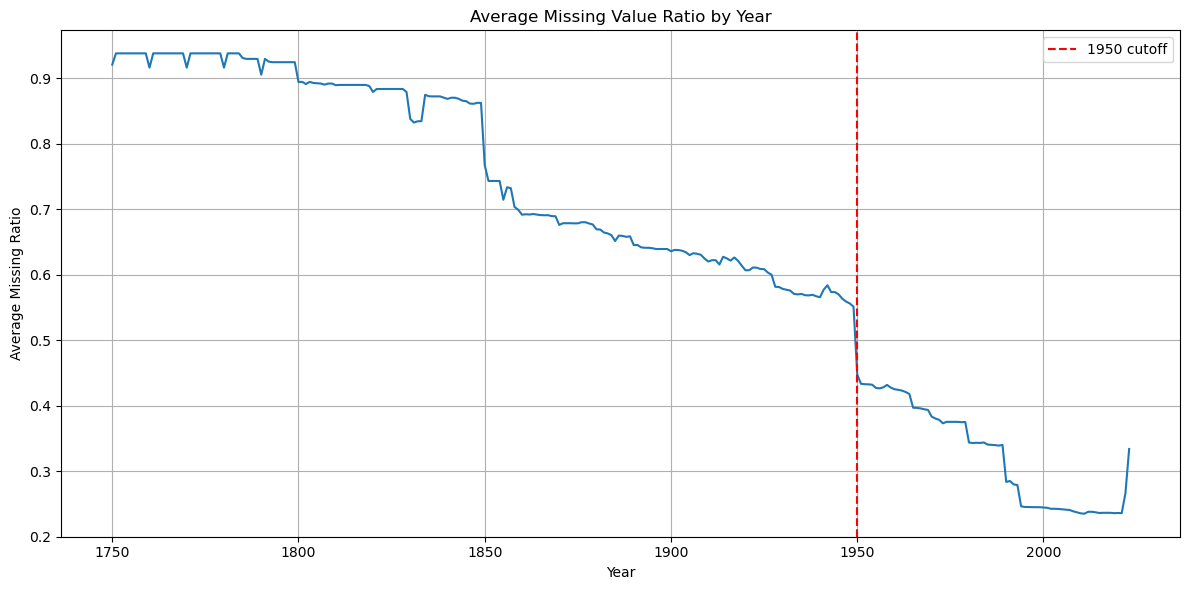

In [7]:
missing_by_year = df[df.columns[4:]].isna().groupby(df['year']).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(missing_by_year.index, missing_by_year.mean(axis=1))
plt.axvline(1950, color='red', linestyle='--', label='1950 cutoff')
plt.title('Average Missing Value Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Missing Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Filter dataset to only include years from 1950 onwards
df_post_1950 = df[df["year"] >= 1950].reset_index(drop=True)

# Recalculate missing value percentage after filtering
missing_post_1950 = df_post_1950.isna().mean().sort_values(ascending=False)

# Identify columns to drop (more than 50% missing after 1950)
cols_to_drop = missing_post_1950[missing_post_1950 > 0.5].index.tolist()

df_cleaned = df_post_1950.drop(columns=cols_to_drop)


In [10]:
df_cleaned

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,...,NaN,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,...,NaN,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,...,NaN,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,...,NaN,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,AFG,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,...,NaN,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,0.0,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,0.0,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,0.0,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,0.0,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


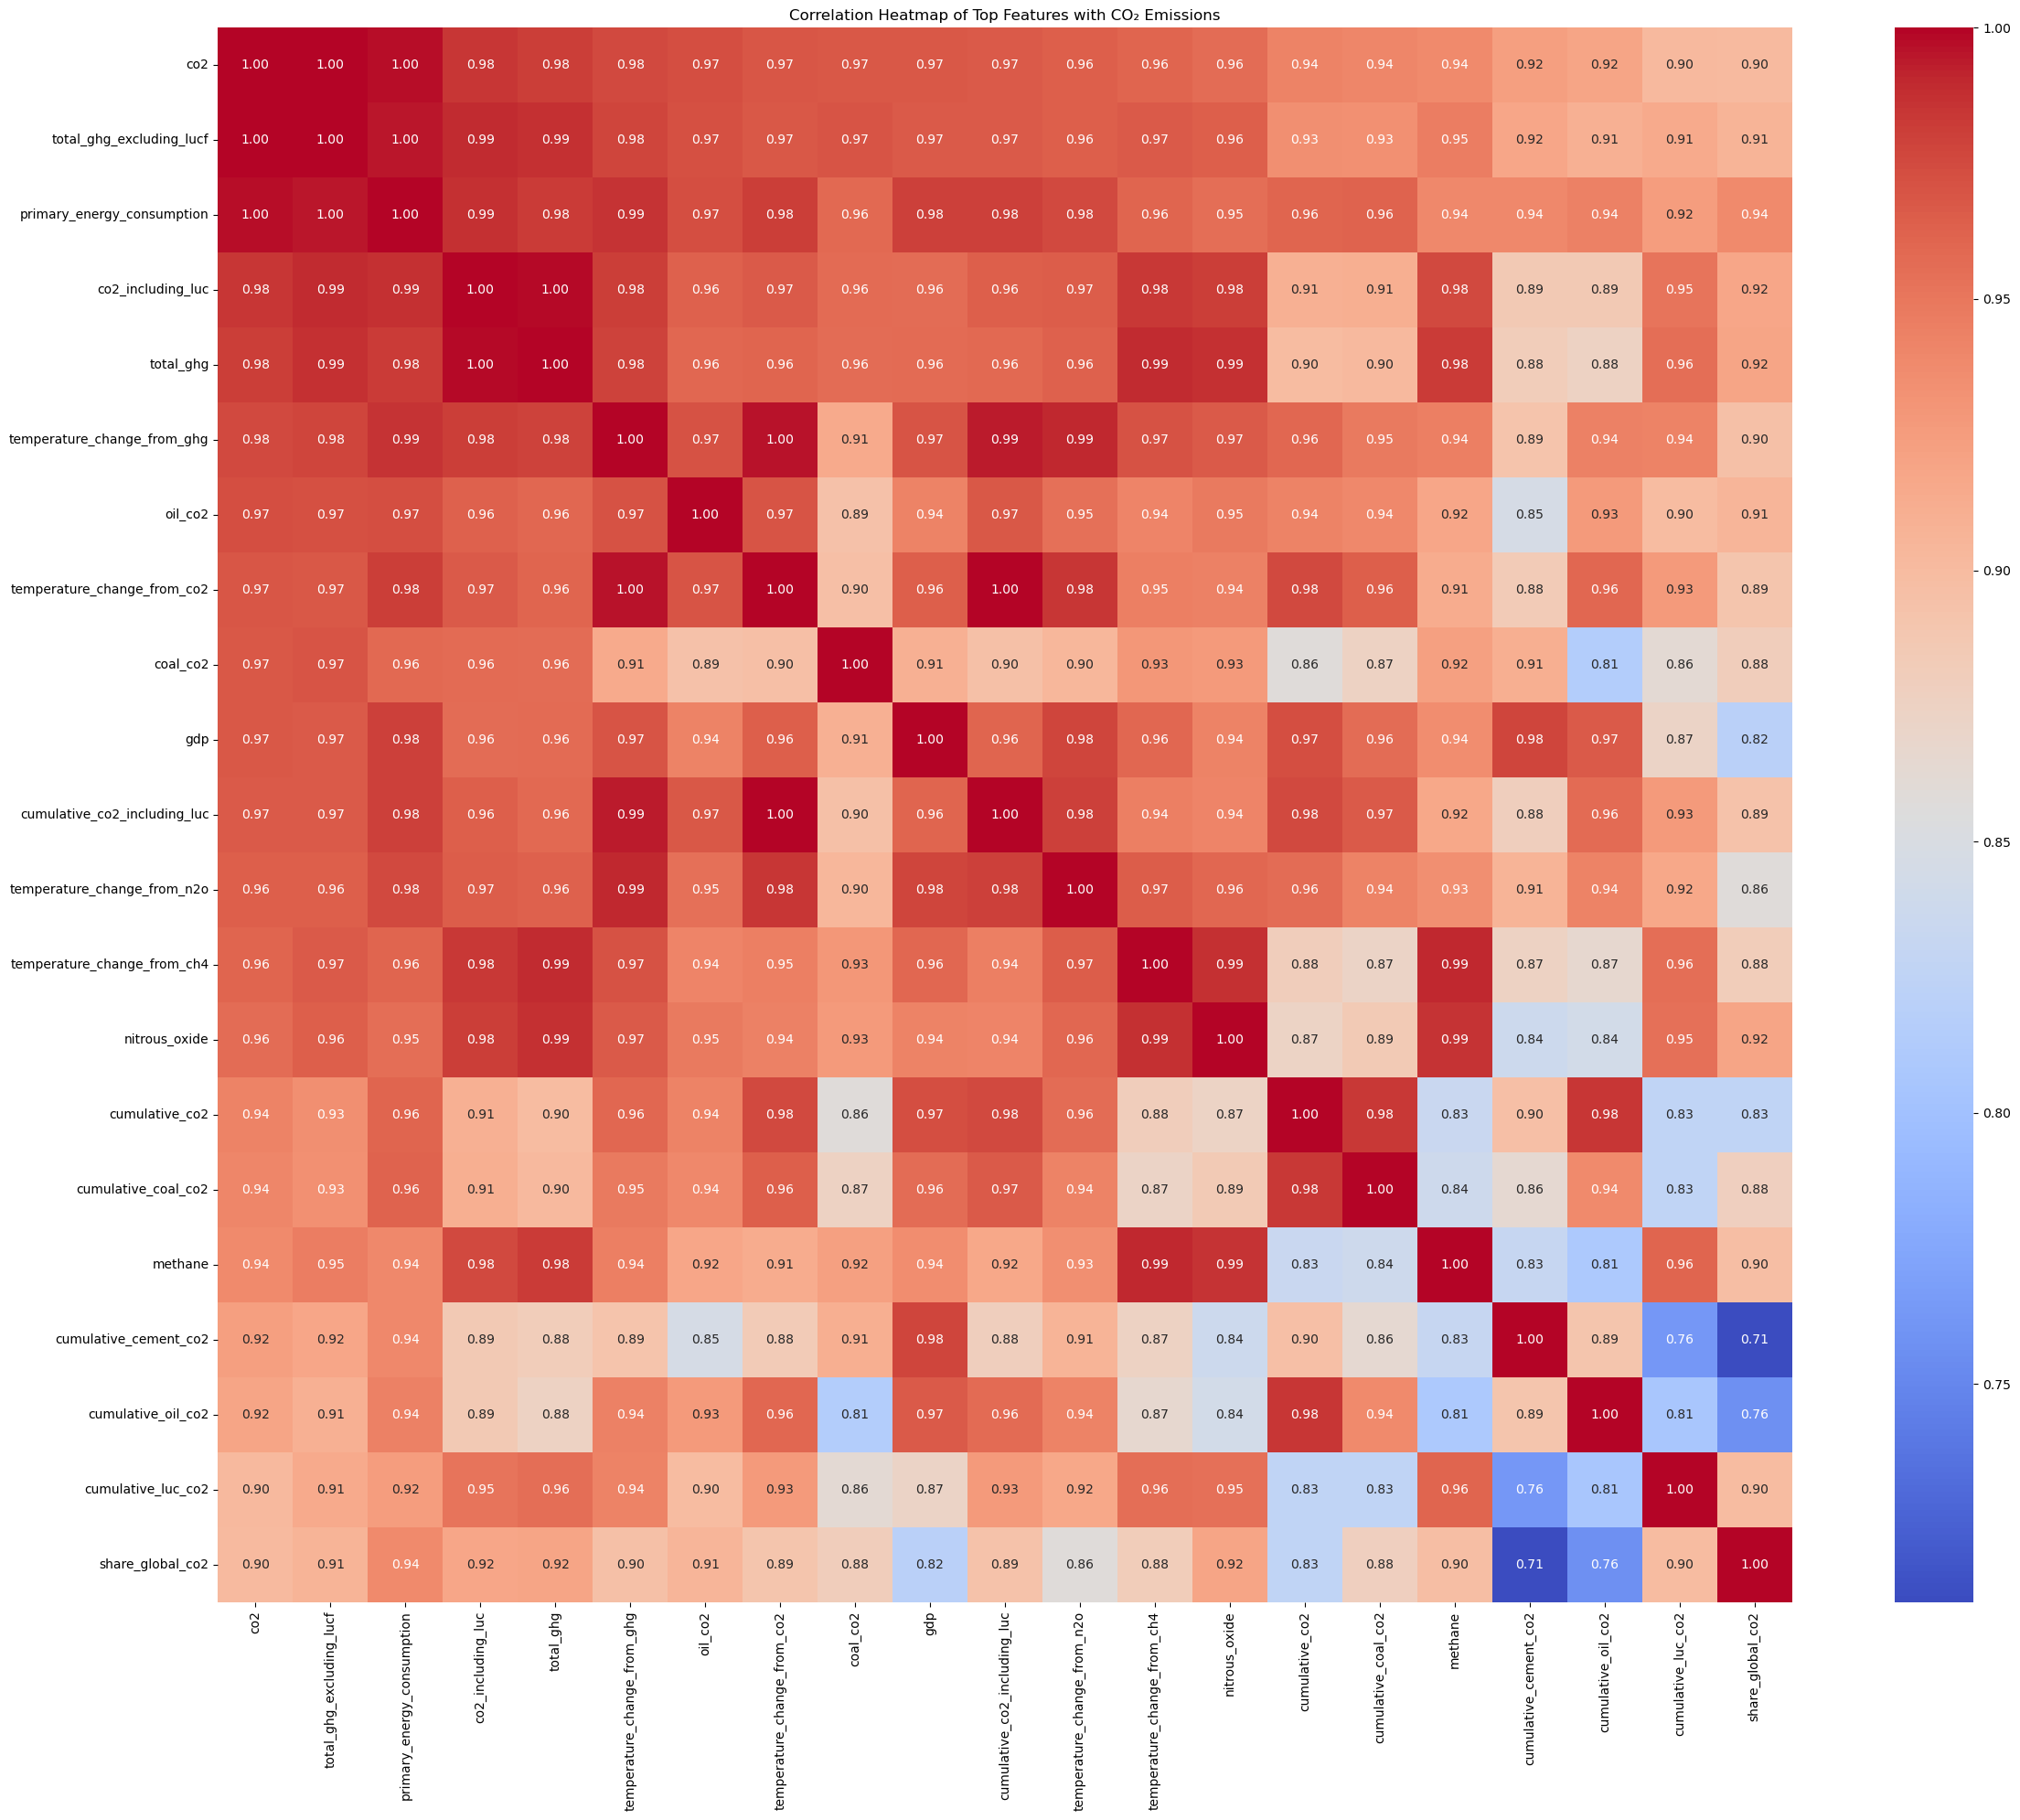

['total_ghg_excluding_lucf',
 'primary_energy_consumption',
 'co2_including_luc',
 'total_ghg',
 'temperature_change_from_ghg',
 'oil_co2',
 'temperature_change_from_co2',
 'coal_co2',
 'gdp',
 'cumulative_co2_including_luc',
 'temperature_change_from_n2o',
 'temperature_change_from_ch4',
 'nitrous_oxide',
 'cumulative_co2',
 'cumulative_coal_co2',
 'methane',
 'cumulative_cement_co2',
 'cumulative_oil_co2',
 'cumulative_luc_co2',
 'share_global_co2']

In [11]:
import seaborn as sns
import numpy as np

numeric_df = df_cleaned.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

co2_corr = correlation_matrix['co2'].drop('co2').sort_values(key=lambda x: abs(x), ascending=False)

top_features = co2_corr.head(20).index.tolist()

heatmap_features = ['co2'] + top_features

# Plot heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(
    correlation_matrix.loc[heatmap_features, heatmap_features],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation Heatmap of Top Features with CO₂ Emissions")
plt.tight_layout()
plt.show()

top_features


In [12]:
selected_columns = [
    'year',
    'population',
    'gdp',
    'primary_energy_consumption',
    'oil_co2',
    'coal_co2',
    'total_ghg',
    'co2_including_luc',
    'temperature_change_from_ghg',
    'co2'
]
df_selected = df_cleaned[selected_columns + ['country']]  # keep 'country' for region-based filtering

# General dataset insights using pandas
insight_summary = {
    "year_range": (df_selected["year"].min(), df_selected["year"].max()),
    "countries": df_selected["country"].nunique(),
    "country_sample": df_selected["country"].unique()[:10].tolist(),
    "missing_values_percent": df_selected.isna().mean().sort_values(ascending=False).round(3),
    "feature_summary": df_selected.describe().T[["mean", "std", "min", "max"]]
}


In [13]:
print(insight_summary['missing_values_percent'])

primary_energy_consumption     0.459
gdp                            0.389
coal_co2                       0.372
co2_including_luc              0.200
total_ghg                      0.152
oil_co2                        0.127
population                     0.093
co2                            0.078
temperature_change_from_ghg    0.065
year                           0.000
country                        0.000
dtype: float64


In [14]:
print(insight_summary['year_range'])

(1950, 2023)


In [15]:
print(insight_summary['countries'])

255


In [16]:
print(insight_summary['feature_summary'])

                                     mean           std           min  \
year                         1.986579e+03  2.137400e+01  1.950000e+03   
population                   9.534355e+07  4.741614e+08  5.010000e+02   
gdp                          4.130017e+11  3.552073e+12  4.998000e+07   
primary_energy_consumption   2.492937e+03  1.125748e+04  0.000000e+00   
oil_co2                      1.692765e+02  7.930882e+02  0.000000e+00   
coal_co2                     2.548632e+02  1.086888e+03  0.000000e+00   
total_ghg                    8.523714e+02  3.477273e+03 -1.496100e+01   
co2_including_luc            6.296565e+02  2.641113e+03 -9.969300e+01   
temperature_change_from_ghg  2.108365e-02  9.121949e-02 -1.000000e-03   
co2                          6.084455e+02  2.474606e+03  0.000000e+00   

                                      max  
year                         2.023000e+03  
population                   8.091735e+09  
gdp                          1.301126e+14  
primary_energy_consu

In [17]:
df_selected.describe()

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2
count,18764.000000,1.702000e+04,1.147200e+04,10151.000000,16378.000000,11787.000000,15910.000000,15009.000000,17538.000000,17300.000000
mean,1986.579407,9.534355e+07,4.130017e+11,2492.937070,169.276499,254.863159,852.371405,629.656515,0.021084,608.445532
std,21.373997,4.741614e+08,3.552073e+12,11257.482287,793.088202,1086.888136,3477.273304,2641.113007,0.091219,2474.606162
min,1950.000000,5.010000e+02,4.998000e+07,0.000000,0.000000,0.000000,-14.961000,-99.693000,-0.001000,0.000000
25%,1968.000000,5.317765e+05,8.479572e+09,7.586500,0.531000,0.048000,8.221500,5.183000,0.000000,0.654750
50%,1987.000000,4.482224e+06,3.224005e+10,67.641000,3.554000,2.363000,41.991000,28.195000,0.001000,7.865500
75%,2005.000000,1.774366e+07,1.532196e+11,468.528000,28.251000,35.121000,161.195750,115.942000,0.004000,86.427750
max,2023.000000,8.091735e+09,1.301126e+14,172119.062000,12411.968000,15401.220000,53816.852000,41416.480000,1.668000,37791.570000


In [18]:
# Filter Thailand as test set
test_df = df_selected[df_selected["country"] == "Thailand"]

In [19]:
test_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
16840,1950,20428403.0,2.609420e+10,NaN,0.828,0.044,178.956,223.872,0.003,0.956,Thailand
16841,1951,20965189.0,2.794396e+10,NaN,0.890,0.048,181.572,224.330,0.003,1.091,Thailand
16842,1952,21527581.0,2.948582e+10,NaN,1.100,0.055,187.429,232.290,0.003,1.278,Thailand
16843,1953,22109322.0,3.272660e+10,NaN,1.403,0.099,192.819,236.698,0.004,1.644,Thailand
16844,1954,22713342.0,3.246220e+10,NaN,1.655,0.206,197.743,243.131,0.004,2.050,Thailand
...,...,...,...,...,...,...,...,...,...,...,...
16909,2019,71522265.0,1.149131e+12,1479.745,103.652,70.060,435.538,319.123,0.015,281.877,Thailand
16910,2020,71641484.0,1.078333e+12,1375.758,96.312,74.799,425.391,307.369,0.015,271.923,Thailand
16911,2021,71727340.0,1.095187e+12,1386.810,90.920,76.648,421.067,301.862,0.015,267.142,Thailand
16912,2022,71735320.0,1.124144e+12,1387.893,105.828,69.809,426.320,306.364,0.015,272.573,Thailand


In [ ]:
sea_countries = [
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", 
    "Myanmar", "Philippines", "Singapore", "Timor", "Vietnam"
]


sea_df = df_selected[df_selected["country"].isin(sea_countries)]
sea_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
2590,1950,48315.0,NaN,NaN,0.154,0.000,0.921,1.086,0.000,0.414,Brunei
2591,1951,51211.0,NaN,NaN,0.033,0.000,0.661,0.852,0.000,0.300,Brunei
2592,1952,54252.0,NaN,NaN,0.051,0.000,0.913,1.115,0.000,0.322,Brunei
2593,1953,57582.0,NaN,NaN,0.077,0.000,1.045,1.252,0.000,0.344,Brunei
2594,1954,61226.0,NaN,NaN,0.085,0.000,1.219,1.429,0.000,0.359,Brunei
...,...,...,...,...,...,...,...,...,...,...,...
18389,2019,97173778.0,7.316531e+11,1202.636,70.808,191.443,543.980,442.503,0.010,339.147,Vietnam
18390,2020,98079196.0,7.526296e+11,1204.393,68.389,215.817,560.892,460.607,0.011,362.460,Vietnam
18391,2021,98935101.0,7.719120e+11,1208.554,64.076,172.395,517.077,413.404,0.011,313.973,Vietnam
18392,2022,99680656.0,8.338038e+11,1244.068,67.727,157.181,500.590,395.764,0.011,297.634,Vietnam


In [21]:

# Keep rest of the world excluding Thailand and SEA for global training set
global_df = df_selected[~df_selected["country"].isin(sea_countries + ["Thailand"])]
global_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,7776182.0,9.421400e+09,NaN,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan
1,1951,7879343.0,9.692280e+09,NaN,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan
2,1952,7987783.0,1.001733e+10,NaN,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan
3,1953,8096703.0,1.063052e+10,NaN,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan
4,1954,8207953.0,1.086636e+10,NaN,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
18759,2019,15271377.0,2.514642e+10,46.120,3.778,6.013,34.348,19.807,0.002,10.263,Zimbabwe
18760,2020,15526888.0,2.317871e+10,41.997,3.063,4.935,31.323,17.430,0.002,8.495,Zimbabwe
18761,2021,15797220.0,2.514009e+10,42.145,3.735,5.938,33.549,18.752,0.002,10.204,Zimbabwe
18762,2022,16069061.0,2.590159e+10,NaN,3.379,6.516,33.772,18.447,0.002,10.425,Zimbabwe


In [23]:
# Sample 30% of SEA countries for training and keep the rest for validation
sea_train_df = sea_df.groupby("country", group_keys=False).sample(frac=0.3, random_state=42)
sea_val_df = sea_df[~sea_df.index.isin(sea_train_df.index)]
sea_train_df, sea_val_df

(       year  population           gdp  primary_energy_consumption  oil_co2  \
 2594   1954     61226.0           NaN                         NaN    0.085   
 2653   2013    411206.0           NaN                      39.397    1.656   
 2608   1968    126238.0           NaN                         NaN    0.143   
 2590   1950     48315.0           NaN                         NaN    0.154   
 2618   1978    174901.0           NaN                         NaN    0.542   
 ...     ...         ...           ...                         ...      ...   
 18386  2016  94000115.0  5.930066e+11                     898.778   55.369   
 18331  1961  33409061.0  4.231556e+10                         NaN    2.026   
 18371  2001  77969356.0  2.348463e+11                     242.045   25.564   
 18340  1970  41475227.0  4.989986e+10                      90.643   20.496   
 18374  2004  80338978.0  2.881490e+11                     347.775   33.891   
 
        coal_co2  total_ghg  co2_including_luc  te

In [24]:
# Final training set = global + sampled SEA
train_df = pd.concat([global_df, sea_train_df], ignore_index=True)
train_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,7776182.0,9.421400e+09,NaN,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan
1,1951,7879343.0,9.692280e+09,NaN,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan
2,1952,7987783.0,1.001733e+10,NaN,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan
3,1953,8096703.0,1.063052e+10,NaN,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan
4,1954,8207953.0,1.086636e+10,NaN,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
18217,2016,94000115.0,5.930066e+11,898.778,55.369,106.855,468.074,377.657,0.010,220.980,Vietnam
18218,1961,33409061.0,4.231556e+10,NaN,2.026,5.727,111.854,73.935,0.003,7.978,Vietnam
18219,2001,77969356.0,2.348463e+11,242.045,25.564,24.952,270.344,215.130,0.007,60.984,Vietnam
18220,1970,41475227.0,4.989986e+10,90.643,20.496,7.288,129.457,69.563,0.004,28.173,Vietnam


In [25]:
train = train_df.to_csv('train.csv')

In [26]:
test = test_df.to_csv('test.csv')

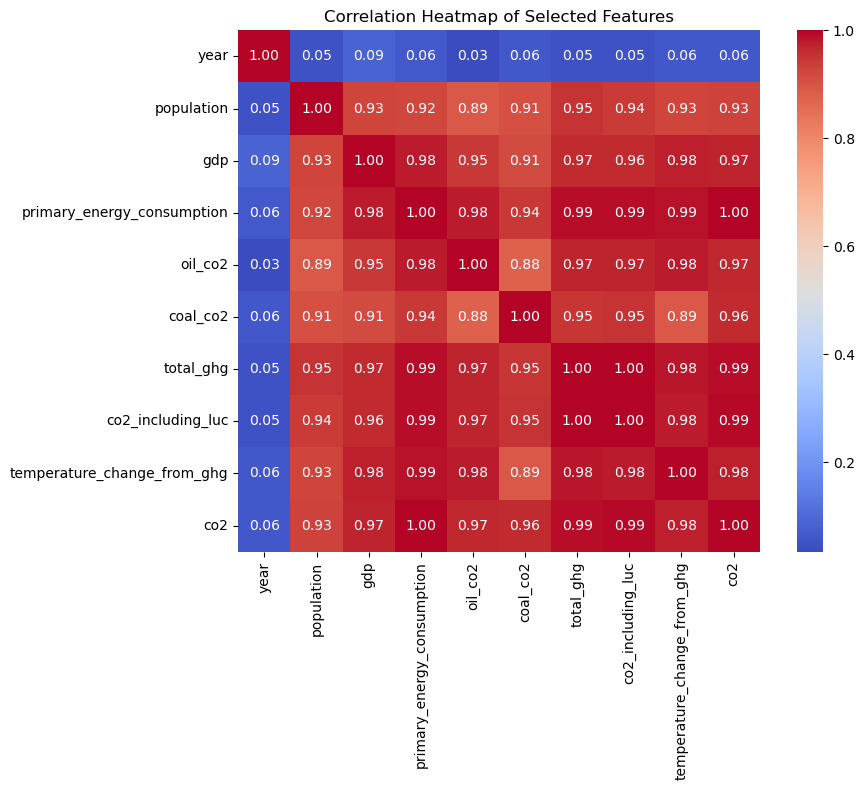

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_selected is already defined
selected_columns = [
    'year',
    'population',
    'gdp',
    'primary_energy_consumption',
    'oil_co2',
    'coal_co2',
    'total_ghg',
    'co2_including_luc',
    'temperature_change_from_ghg',
    'co2'
]

# Drop rows with NaN values to avoid skewed correlations
df_corr = df_selected[selected_columns].dropna()

correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()


In [28]:
num_countries_train = train_df['country'].nunique()
unique_countries_train = train_df['country'].unique().tolist()

In [29]:
print(num_countries_train)
print(unique_countries_train)

254
['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Central America (GCP)', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia'

In [30]:
# Re-load cleaned post-1950 dataset (with ISO codes still available)
# Reloading original cleaned dataset to include 'iso_code' which was previously dropped
df_post_1950 = df[df["year"] >= 1950].reset_index(drop=True)
df_filtered = df_post_1950[selected_columns + ['country', 'iso_code']]

# Use train_df's countries for ISO filtering
valid_iso_countries = df_filtered[df_filtered["country"].isin(train_df["country"])]

# Keep only rows with valid 3-letter ISO codes (used to identify real countries)
valid_iso_countries = valid_iso_countries[valid_iso_countries["iso_code"].str.len() == 3]

# Filter to training data countries only
filtered_train_df = valid_iso_countries[valid_iso_countries["country"].isin(train_df["country"].unique())]


In [31]:
filtered_train_df = valid_iso_countries[valid_iso_countries["country"].isin(train_df["country"].unique())]

In [32]:
filtered_train_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country,iso_code
0,1950,7776182.0,9.421400e+09,NaN,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan,AFG
1,1951,7879343.0,9.692280e+09,NaN,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan,AFG
2,1952,7987783.0,1.001733e+10,NaN,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan,AFG
3,1953,8096703.0,1.063052e+10,NaN,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan,AFG
4,1954,8207953.0,1.086636e+10,NaN,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...
18759,2019,15271377.0,2.514642e+10,46.120,3.778,6.013,34.348,19.807,0.002,10.263,Zimbabwe,ZWE
18760,2020,15526888.0,2.317871e+10,41.997,3.063,4.935,31.323,17.430,0.002,8.495,Zimbabwe,ZWE
18761,2021,15797220.0,2.514009e+10,42.145,3.735,5.938,33.549,18.752,0.002,10.204,Zimbabwe,ZWE
18762,2022,16069061.0,2.590159e+10,NaN,3.379,6.516,33.772,18.447,0.002,10.425,Zimbabwe,ZWE


In [33]:
num_countries_train = filtered_train_df['country'].nunique()
unique_countries_train = filtered_train_df['country'].unique().tolist()

In [34]:
num_countries_train, unique_countries_train

(217,
 ['Afghanistan',
  'Albania',
  'Algeria',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antarctica',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Christmas Island',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'East Timor',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Equatorial Guinea'

In [25]:
test_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
16840,1950,20428403.0,2.609420e+10,NaN,0.828,0.044,178.956,223.872,0.003,0.956,Thailand
16841,1951,20965189.0,2.794396e+10,NaN,0.890,0.048,181.572,224.330,0.003,1.091,Thailand
16842,1952,21527581.0,2.948582e+10,NaN,1.100,0.055,187.429,232.290,0.003,1.278,Thailand
16843,1953,22109322.0,3.272660e+10,NaN,1.403,0.099,192.819,236.698,0.004,1.644,Thailand
16844,1954,22713342.0,3.246220e+10,NaN,1.655,0.206,197.743,243.131,0.004,2.050,Thailand
...,...,...,...,...,...,...,...,...,...,...,...
16909,2019,71522265.0,1.149131e+12,1479.745,103.652,70.060,435.538,319.123,0.015,281.877,Thailand
16910,2020,71641484.0,1.078333e+12,1375.758,96.312,74.799,425.391,307.369,0.015,271.923,Thailand
16911,2021,71727340.0,1.095187e+12,1386.810,90.920,76.648,421.067,301.862,0.015,267.142,Thailand
16912,2022,71735320.0,1.124144e+12,1387.893,105.828,69.809,426.320,306.364,0.015,272.573,Thailand


In [35]:
val_with_iso = pd.merge(
    sea_val_df,
    df[['country', 'year', 'iso_code']],
    on=['country', 'year'],
    how='left'
)

# Keep only rows with valid 3-letter ISO codes
filtered_val_df = val_with_iso[val_with_iso["iso_code"].str.len() == 3]

In [36]:
filtered_val_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country,iso_code
0,1951,51211.0,NaN,NaN,0.033,0.000,0.661,0.852,0.000,0.300,Brunei,BRN
1,1952,54252.0,NaN,NaN,0.051,0.000,0.913,1.115,0.000,0.322,Brunei,BRN
2,1953,57582.0,NaN,NaN,0.077,0.000,1.045,1.252,0.000,0.344,Brunei,BRN
3,1956,69569.0,NaN,NaN,0.029,0.000,0.973,1.241,0.000,0.297,Brunei,BRN
4,1957,74184.0,NaN,NaN,0.029,0.000,0.887,1.113,0.000,0.293,Brunei,BRN
...,...,...,...,...,...,...,...,...,...,...,...,...
463,2019,97173778.0,7.316531e+11,1202.636,70.808,191.443,543.980,442.503,0.010,339.147,Vietnam,VNM
464,2020,98079196.0,7.526296e+11,1204.393,68.389,215.817,560.892,460.607,0.011,362.460,Vietnam,VNM
465,2021,98935101.0,7.719120e+11,1208.554,64.076,172.395,517.077,413.404,0.011,313.973,Vietnam,VNM
466,2022,99680656.0,8.338038e+11,1244.068,67.727,157.181,500.590,395.764,0.011,297.634,Vietnam,VNM


In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the features to scale (excluding target, year, and country)
features_to_scale = [
    'population',
    'gdp',
    'primary_energy_consumption',
    'oil_co2',
    'coal_co2',
    'total_ghg',
    'co2_including_luc',
    'temperature_change_from_ghg'
]

# Prepare training data
X_train = filtered_train_df[features_to_scale]
y_train = filtered_train_df['co2']
train_meta = filtered_train_df[['year', 'country']]

# Fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features_to_scale)
X_train_scaled = pd.concat([train_meta.reset_index(drop=True), X_train_scaled], axis=1)

# Scale validation data using the same scaler
X_val = filtered_val_df[features_to_scale]
y_val = filtered_val_df['co2']
val_meta = filtered_val_df[['year', 'country']]

X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=features_to_scale)
X_val_scaled = pd.concat([val_meta.reset_index(drop=True), X_val_scaled], axis=1)

# Prepare test data (Thailand)
test_with_iso = pd.merge(test_df, df[['country', 'year', 'iso_code']], on=['country', 'year'], how='left')
test_with_iso = test_with_iso[test_with_iso["iso_code"].str.len() == 3]
X_test = test_with_iso[features_to_scale]
y_test = test_with_iso['co2']
test_meta = test_with_iso[['year', 'country']]

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features_to_scale)
X_test_scaled = pd.concat([test_meta.reset_index(drop=True), X_test_scaled], axis=1)



In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Define features to scale (excluding target, year, and country)
features_to_scale = [
    'population',
    'gdp',
    'primary_energy_consumption',
    'oil_co2',
    'coal_co2',
    'total_ghg',
    'co2_including_luc',
    'temperature_change_from_ghg'
]

# Extract raw input features
X_train_raw = filtered_train_df[features_to_scale]
X_val_raw = filtered_val_df[features_to_scale]
X_test_raw = test_with_iso[features_to_scale]

# Initialize scalers and imputers
scaler = MinMaxScaler()
imputer = SimpleImputer(strategy='mean')

# Step 1: Impute training, then fit scaler
X_train_imputed = imputer.fit_transform(X_train_raw)
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Step 2: Impute and scale val/test using training fit
X_val_imputed = imputer.transform(X_val_raw)
X_val_scaled = scaler.transform(X_val_imputed)

X_test_imputed = imputer.transform(X_test_raw)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert to DataFrame and reattach meta columns
X_train_final = pd.concat([
    filtered_train_df[['year', 'country']].reset_index(drop=True),
    pd.DataFrame(X_train_scaled, columns=features_to_scale)
], axis=1)

X_val_final = pd.concat([
    filtered_val_df[['year', 'country']].reset_index(drop=True),
    pd.DataFrame(X_val_scaled, columns=features_to_scale)
], axis=1)

X_test_final = pd.concat([
    test_with_iso[['year', 'country']].reset_index(drop=True),
    pd.DataFrame(X_test_scaled, columns=features_to_scale)
], axis=1)


In [44]:
X_test_final.isna().sum()

year                           0
country                        0
population                     0
gdp                            0
primary_energy_consumption     0
oil_co2                        0
coal_co2                       0
total_ghg                      0
co2_including_luc              0
temperature_change_from_ghg    0
dtype: int64

In [45]:
X_train_final

,year,country,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg
0,1950,Afghanistan,0.005407,0.000348,0.013227,0.000024,0.000002,0.002461,0.009142,0.006920
1,1951,Afghanistan,0.005479,0.000358,0.013227,0.000025,0.000003,0.002533,0.009223,0.006920
2,1952,Afghanistan,0.005554,0.000370,0.013227,0.000023,0.000004,0.002597,0.009302,0.006920
3,1953,Afghanistan,0.005630,0.000392,0.013227,0.000026,0.000004,0.002669,0.009394,0.006920
4,1954,Afghanistan,0.005707,0.000401,0.013227,0.000024,0.000005,0.002733,0.009468,0.006920
...,...,...,...,...,...,...,...,...,...,...
16053,2019,Zimbabwe,0.010619,0.000931,0.000972,0.001430,0.000703,0.003526,0.010209,0.010381
16054,2020,Zimbabwe,0.010797,0.000858,0.000885,0.001159,0.000577,0.003310,0.010006,0.010381
16055,2021,Zimbabwe,0.010985,0.000930,0.000889,0.001413,0.000694,0.003469,0.010119,0.010381
16056,2022,Zimbabwe,0.011174,0.000959,0.013227,0.001279,0.000762,0.003485,0.010093,0.010381


In [60]:
X_test_final

,year,country,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg
0,1950,Thailand,0.014205,0.000966,0.013227,0.000313,0.000005,0.013867,0.027642,0.013841
1,1951,Thailand,0.014578,0.001034,0.013227,0.000337,0.000006,0.014054,0.027681,0.013841
2,1952,Thailand,0.014969,0.001092,0.013227,0.000416,0.000006,0.014473,0.028361,0.013841
3,1953,Thailand,0.015374,0.001212,0.013227,0.000531,0.000012,0.014859,0.028738,0.017301
4,1954,Thailand,0.015794,0.001202,0.013227,0.000626,0.000024,0.015211,0.029287,0.017301
...,...,...,...,...,...,...,...,...,...,...
69,2019,Thailand,0.049735,0.042612,0.031200,0.039224,0.008193,0.032216,0.035779,0.055363
70,2020,Thailand,0.049817,0.039987,0.029008,0.036447,0.008748,0.031490,0.034775,0.055363
71,2021,Thailand,0.049877,0.040612,0.029241,0.034406,0.008964,0.031181,0.034304,0.055363
72,2022,Thailand,0.049883,0.041686,0.029263,0.040048,0.008164,0.031556,0.034689,0.055363


In [47]:
import numpy as np

# Clean train
train_mask = np.isfinite(filtered_train_df['co2'].values)
X_train_model = X_train_final.loc[train_mask].drop(columns=['year', 'country'])
y_train = filtered_train_df.loc[train_mask, 'co2'].values

# Clean val
val_mask = np.isfinite(filtered_val_df['co2'].values)
X_val_model = X_val_final.loc[val_mask].drop(columns=['year', 'country'])
y_val = filtered_val_df.loc[val_mask, 'co2'].values

# Clean test
test_mask = np.isfinite(test_with_iso['co2'].values)
X_test_model = X_test_final.loc[test_mask].drop(columns=['year', 'country'])
y_test = test_with_iso.loc[test_mask, 'co2'].values


In [48]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train_model, y_train)

y_pred_test = model.predict(X_test_model)

print("Test MAE :", mean_absolute_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test R²  :", r2_score(y_test, y_pred_test))


Test MAE : 11.946482587505031
Test RMSE: 14.761464061181709
Test R²  : 0.979788659531012


In [69]:
np.max(X_train_raw.total_ghg)

13968.915

In [49]:
y_train.shape

(14981,)

In [50]:
y_test.shape

(74,)

In [51]:
X_test_model

,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg
0,0.014205,0.000966,0.013227,0.000313,0.000005,0.013867,0.027642,0.013841
1,0.014578,0.001034,0.013227,0.000337,0.000006,0.014054,0.027681,0.013841
2,0.014969,0.001092,0.013227,0.000416,0.000006,0.014473,0.028361,0.013841
3,0.015374,0.001212,0.013227,0.000531,0.000012,0.014859,0.028738,0.017301
4,0.015794,0.001202,0.013227,0.000626,0.000024,0.015211,0.029287,0.017301
...,...,...,...,...,...,...,...,...
69,0.049735,0.042612,0.031200,0.039224,0.008193,0.032216,0.035779,0.055363
70,0.049817,0.039987,0.029008,0.036447,0.008748,0.031490,0.034775,0.055363
71,0.049877,0.040612,0.029241,0.034406,0.008964,0.031181,0.034304,0.055363
72,0.049883,0.041686,0.029263,0.040048,0.008164,0.031556,0.034689,0.055363


In [52]:
thailand_2030 = pd.DataFrame([{
    "population": 70_000_000,
    "gdp": 8.5e11,  # 850B USD
    "primary_energy_consumption": 30,
    "oil_co2": 100,
    "coal_co2": 80,
    "total_ghg": 400,
    "co2_including_luc": 320,
    "temperature_change_from_ghg": 0.08,
    "year": 2030,
    "country": "Thailand"
}])


In [ ]:
X_train

In [57]:
np.max(y_train)

11902.503

In [58]:
np.min(y_train)

0.0

In [70]:
# Extract only feature columns
X_2030_raw = thailand_2030[features_to_scale]

# Impute and scale using fitted imputer and scaler from training
X_2030_imputed = imputer.transform(X_2030_raw)
X_2030_scaled = scaler.transform(X_2030_imputed)

# Predict
predicted_co2_2030 = model.predict(X_2030_scaled)[0]

print(f"Predicted CO₂ emissions for Thailand in 2030: {predicted_co2_2030:.2f} million tonnes")


Predicted CO₂ emissions for Thailand in 2030: 162.41 million tonnes
